<a href="https://colab.research.google.com/github/IvanKatorgin/Feature-Engineering/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Работа с признаками и построение моделей". Домашнее задание 4. Проблема качества данных. Каторгин И.П.

## Описание задания

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

Этапы работы:
1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

## Получите и загрузите данные

In [182]:
# загрузим необходимые библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [183]:
train = pd.read_csv('train.csv', sep=',', encoding='utf8')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Первоначально проведем разведочный анализ данных

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [186]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [188]:
train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [189]:
train['Name'].value_counts()

,count
Name,
"Braund, Mr. Owen Harris",1
"Boulos, Mr. Hanna",1
"Frolicher-Stehli, Mr. Maxmillian",1
"Gilinski, Mr. Eliezer",1
"Murdlin, Mr. Joseph",1
...,...
"Kelly, Miss. Anna Katherine ""Annie Kate""",1
"McCoy, Mr. Bernard",1
"Johnson, Mr. William Cahoone Jr",1


In [190]:
train['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [191]:
train['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [192]:
train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [193]:
train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [194]:
train['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [195]:
train['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


In [196]:
train['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [197]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


## Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества

Удаляем все пропущенные значения и категориальные переменные

In [198]:
# удалим категориальные переменные
train = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [200]:
train.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [201]:
# имеются пропуски в столбцах Age и Embarked. Удалим их
train = train.dropna()

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


Строим и обучаем модель

In [203]:
# переведем признак Sex и Embarked в числовой формат
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])

In [204]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = train.drop(columns=['Survived'])
y = train['Survived']

In [205]:
# разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# обучим модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [207]:
predictions = model.predict_proba(X_test)

In [208]:
predictions[:5]

array([[0.03967683, 0.96032317],
       [0.15073431, 0.84926569],
       [0.72813558, 0.27186442],
       [0.06641486, 0.93358514],
       [0.72998891, 0.27001109]])

Оцениваем качество модели

In [209]:
#считаем accuracy на тренировочной выборке
model.score(X_train, y_train)

0.81195079086116

In [210]:
#считаем accuracy на тестовой выборке
model.score(X_test, y_test)

0.7972027972027972

In [211]:
# оценим модель при помощи MSE на тренировочной выборке
mean_squared_error(y_train, model.predict(X_train))

0.18804920913884007

In [212]:
# оценим модель при помощи MSE на тестовой выборке
mean_squared_error(y_test, model.predict(X_test))

0.20279720279720279

Построим ROC-кривую

In [213]:
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

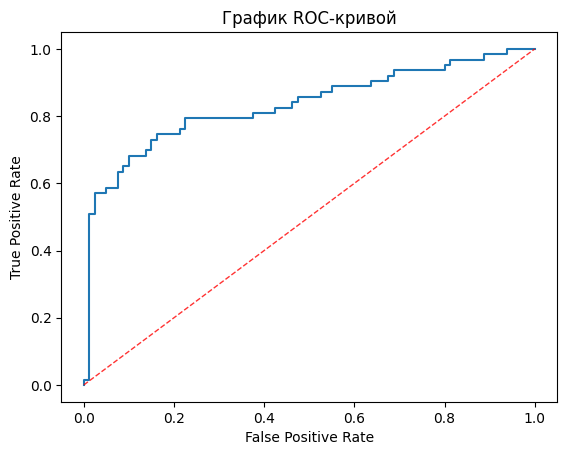

In [214]:
# @title график ROC-кривой

plt.figure()
plt.axes()
l=np.linspace(0,1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(l, l, color = 'red', lw=1, linestyle='--', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('График ROC-кривой')
plt.show()

Вычислим значения ROC-AUC метрики

In [215]:
# вычислим значение roc-auc метрики помощью функции sklearn.metrics.roc_auc_score
roc_auc_score(y_test, predictions[:, 1])

0.8323412698412699

## Снова загрузите полные данные

In [216]:
# снова прочитаем датасет
train_1 = pd.read_csv('train.csv', sep=',', encoding='utf-8')
train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Удалите признаки, которые логически не нужны для построения модели. Обоснуйте

Чтобы решить, какие признаки удалить, посмотрим что означает каждый имеющийся признак в датасете:
- PassengerId — идентификатор пассажира
- Survival — поле в котором указано спасся человек (1) или нет (0)
- Pclass — содержит социально-экономический статус: высокий(1), средний(2), низкий (3)
- Name — имя пассажира
- Sex — пол пассажира
- Age — возраст
- SibSp — содержит информацию о количестве родственников 2-го порядка
- Parch — содержит информацию о количестве родственников на борту 1-го порядка
- Ticket — номер билета
- Fare — цена билета
- Cabin — каюта
- Embarked — порт посадки: C — Cherbourg, Q — Queenstown, S — Southampton

ID пассажира, его имя, номер билета никакого значения не имеют, их исключаем, так же как и номер каюты. На мой взгляд цена билета не является определяющей, скорее социально-экономический статус может быть более значимым признаком. Остальные признаки предлагается оставить

In [217]:
# для построения модели нам не нужны следующие признаки: PassengerId, Name, Ticket, Cabin и Fare
train_1 = train_1.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'])

In [218]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


## Проверьте данные на наличие выбросов

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте

In [ ]:
# частично поиск выбросов мы провели когда проводили разведочный ана данных
# сейчас  посмотрим на распределение значений столбцов

In [219]:
# построим боксплоты для анализа распределения значений столбцов и поиска выбросов
import seaborn as sns
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])

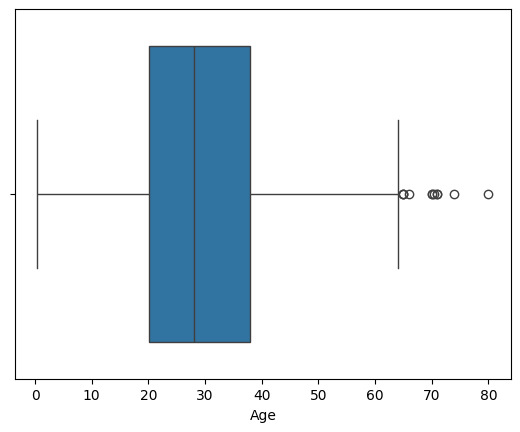

In [220]:
# @title возраст
get_boxplot(train_1, columns=['Age'])

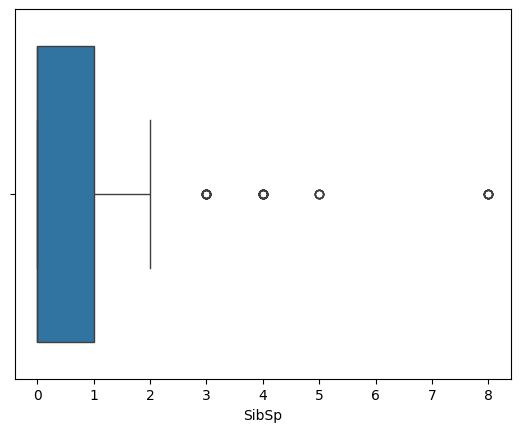

In [221]:
# @title количество родственников 2-го порядка
get_boxplot(train_1, columns=['SibSp'])

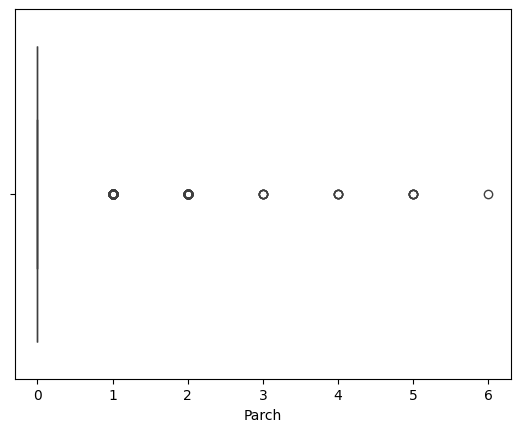

In [222]:
# @title количество родственников на борту 1-го порядка
get_boxplot(train_1, columns=['Parch'])

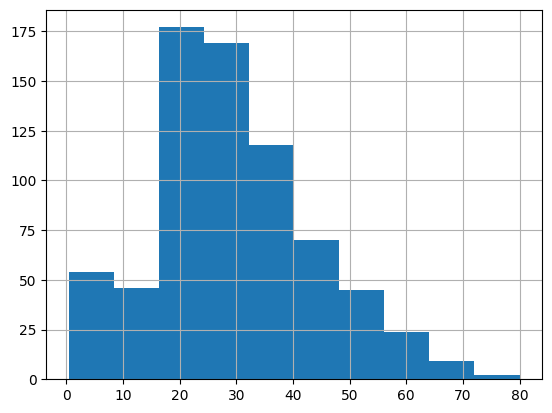

In [223]:
# @title распределение по возрасту
train_1['Age'].hist(bins=10)
plt.show()

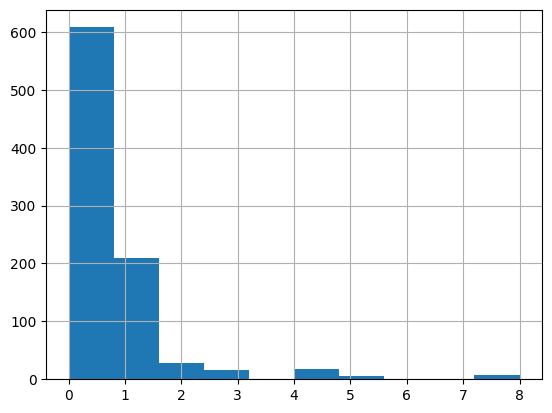

In [224]:
# @title распределение по количеству родственников 2-го порядка
train_1['SibSp'].hist(bins=10)
plt.show()

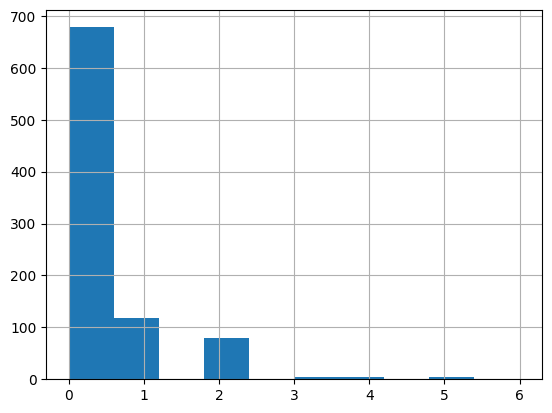

In [225]:
# @title распределение по количеству родственников на борту 1-го порядка
train_1['Parch'].hist(bins=10)
plt.show()

In [ ]:
# в целом аномальных значений в данных не обнаружено

## Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы

In [226]:
# посмотрим на пропуски
train_1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Embarked,2


In [ ]:
# Есть пропуски в столбцах Age и Embarked

In [227]:
# Что будет, если просто удалить пропуски
train_2 = train_1.dropna()
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Embarked  712 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [228]:
# таким образом, если просто удалить пропуски, то у нас останется всего 712 строчек с данными и % потерь составит:
loss = round(100-712/891*100, 2)
loss

20.09

Таким образом, если просто удалить пропуски, то мы потеряем более 20% данных, что довольно существенно

In [229]:
# заполним пропуски в столбцах Age средним значением и столбцах Embarked самым частым значением
train_1 = train_1.fillna({'Age': train_1['Age'].mean(), 'Embarked': train_1['Embarked'].mode()[0]})
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


## Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы

In [230]:
# преобразуем категориальные признаки
train_new = pd.get_dummies(train_1, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])
train_new

,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,False,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,1,38.000000,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2,1,26.000000,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,1,35.000000,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4,0,35.000000,False,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
887,1,19.000000,True,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
888,0,29.699118,False,False,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
889,1,26.000000,True,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False


## *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

<Axes: title={'center': 'Sex'}, xlabel='Sex'>

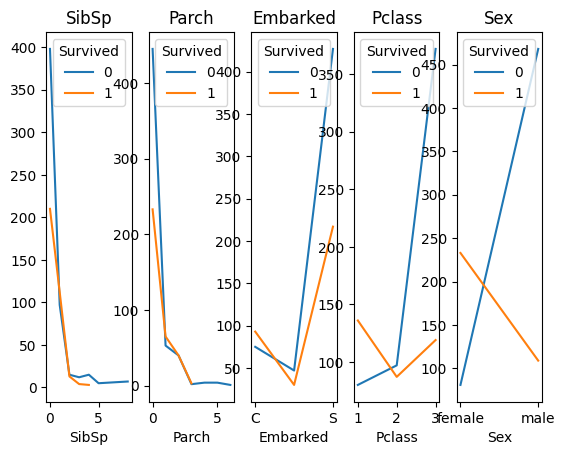

In [231]:
dt = pd.read_csv('train.csv')
fig, axes = plt.subplots(ncols=5)
dt.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
dt.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')
dt.pivot_table('PassengerId', ['Embarked'], 'Survived', 'count').plot(ax=axes[2], title='Embarked')
dt.pivot_table('PassengerId', ['Pclass'], 'Survived', 'count').plot(ax=axes[3], title='Pclass')
dt.pivot_table('PassengerId', ['Sex'], 'Survived', 'count').plot(ax=axes[4], title='Sex')

Выводы по графикам:
1. C ростом числа родственников вероятность спастись резко падает.
2. Количество выживших наибоьшее для тех, кто поднялся на борт в порту Southampton (в принципе это логично, учитывая, что там наибольшее количество пассажиров поднялось на борт)
3. Количество выживших прямопропорционально социально-экономическому классу - для 1-го класса больше выживших, тогда как для людей более низкого класса наоборот, больше невыживших
4. Соотношение выживших / невыживших зависит от пола пассажира - из графика видно, что доля спасшихся женщин (от всех женщин) значительно превышает долю спасшихся мужчин (от всех мужчин)

## *Попробуйте математически преобразовать признак Age

In [232]:
# Преобразуем признак Age путем деления его на три категории - до 12 лет, от 12 до 19 лет, от 19 до 30 лет, от 30 до 60 лет и старше 60 лет
train_new['Age'] = pd.cut(train_new['Age'], bins=[0, 12, 19, 30, 60, np.inf], labels=[1, 2, 3, 4, 5])
train_new

,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,3,False,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,1,4,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2,1,3,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,1,4,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4,0,4,False,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
887,1,2,True,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
888,0,3,False,False,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
889,1,3,True,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False


In [233]:
# преобразуем еще раз признак Age
train_new = pd.get_dummies(train_new, columns=['Age'])
train_new

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Age_1,Age_2,Age_3,Age_4,Age_5
0,0,False,False,True,False,True,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,1,True,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,1,False,False,True,True,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1,True,False,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0,False,False,True,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,False,True,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
887,1,True,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
888,0,False,False,True,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
889,1,True,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False


## Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику

In [234]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = train_new.drop(columns=['Survived'])
y = train_new['Survived']

In [235]:
# разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
# обучим модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [237]:
predictions = model.predict_proba(X_test)

In [238]:
predictions[:5]

array([[0.84720204, 0.15279796],
       [0.77191213, 0.22808787],
       [0.9161394 , 0.0838606 ],
       [0.03964337, 0.96035663],
       [0.32177188, 0.67822812]])

Оцениваем качество модели

In [239]:
#считаем accuracy на тренировочной выборке
model.score(X_train, y_train)

0.8117977528089888

In [240]:
#считаем accuracy на тестовой выборке
model.score(X_test, y_test)

0.7988826815642458

In [241]:
# оценим модель при помощи MSE на тренировочной выборке
mean_squared_error(y_train, model.predict(X_train))

0.18820224719101122

In [242]:
# оценим модель при помощи MSE на тестовой выборке
mean_squared_error(y_test, model.predict(X_test))

0.2011173184357542

Построим ROC-кривую

In [243]:
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions[:,1])

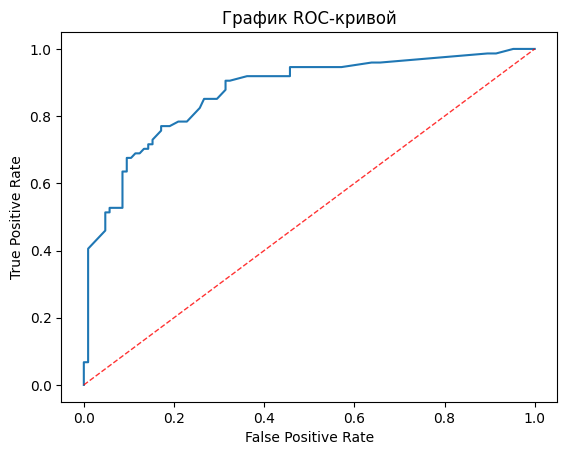

In [244]:
# @title график ROC-кривой

plt.figure()
plt.axes()
l=np.linspace(0,1)
plt.plot(fpr1, tpr1, label='ROC Curve')
plt.plot(l, l, color = 'red', lw=1, linestyle='--', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('График ROC-кривой')
plt.show()

Вычислим значения ROC-AUC метрики

In [245]:
# вычислим значение roc-auc метрики помощью функции sklearn.metrics.roc_auc_score
roc_auc_score(y_test, predictions[:, 1])

0.8697554697554698

Совместим два графика ROC-кривых

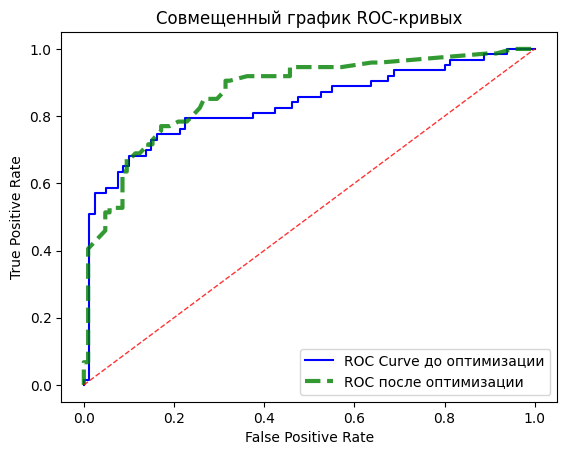

In [246]:
# @title Совмещенный график ROC-кривых

plt.figure
plt.axes()
plt.plot(fpr, tpr, color = 'blue', label='ROC Curve до оптимизации')
plt.plot(fpr1, tpr1, color = 'green', lw=3, linestyle='--', alpha=.8, label='ROC после оптимизации')
plt.plot(l, l, color = 'red', lw=1, linestyle='--', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Совмещенный график ROC-кривых')
plt.legend()
plt.show()

Посчитаем площади под кривыми

In [247]:
# Посчитаем площадь под ROC-кривой до оптимизации
auc(fpr, tpr).round(5)

0.83234

In [248]:
# Посчитаем площадь под ROC-кривой после оптимизации
auc(fpr1, tpr1).round(5)

0.86976

## Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Основные выводы:
1. Для оптимизации первоначальной модели были удалены следующие признаки: PassengerId, Name, Ticket, Cabin и Fare, т.к. данные признаки, на мой взгляд, не влияют существенным образом на качество модели
2. Пропуски в столбцах  были заменены на средние и медианные значения
3. Accuracy на тестовой выборке модели после оптимизации назначительно выросла с 0,79720 до 0,79888, так же как и выросло значение roc-auc с 0,832 до 0,869. Также, если сравнивать графики Roc-кривых, то площадь Roc-кривой после оптимизации увеличилась (0,83 до оптимизации и 0,86 после оптимизации)
4. В целом есть целесообразность работы с данными и признаками при построении моделей машинного обучения. На примере данного датасета было показано, что после оптимизации признаков произошло, пусть и незначительное, но улучшение модели. И при работе с действительно большими данными, оптимизация может привести к еще более значительному повышению качества моделей машинного обучения  